<a href="https://colab.research.google.com/github/lleiva25/Project4/blob/Leslie_Leiva/Produce_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PreTrained Model

In [ ]:
!pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

In [ ]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#Summary of Xception Model
print(model.summary)

91884032/91884032 [==============================] - 1s 0us/step
<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x799d70551930>>


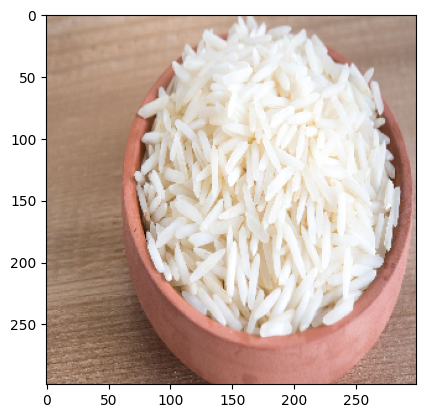

In [ ]:
#loading and preprocessing Rice image
##Rice
IMAGE_PATH='/content/rice1.jpeg'


img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)
#view the image
plt.imshow(img/255.)

In [ ]:
import requests
#fetching labels from Imagenet
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()
imgnet_map={v[1]:k for k, v in imgnet_map.items()}
#make model predictions
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)

1/1 [==============================] - 0s 355ms/step


[[('n04597913', 'wooden_spoon', 0.81733674),
  ('n03786901', 'mortar', 0.0320106),
  ('n04263257', 'soup_bowl', 0.01651668),
  ('n03633091', 'ladle', 0.015266867),
  ('n03775546', 'mixing_bowl', 0.013674909)]]

Pretained Model 2

In [ ]:
 # Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [ ]:
# Load the Xception model
# https://keras.io/api/applications/xception/
model = Xception(
    include_top=True,
    weights='imagenet')

In [ ]:
# Default Image Size for Xception
image_size = (299, 299)

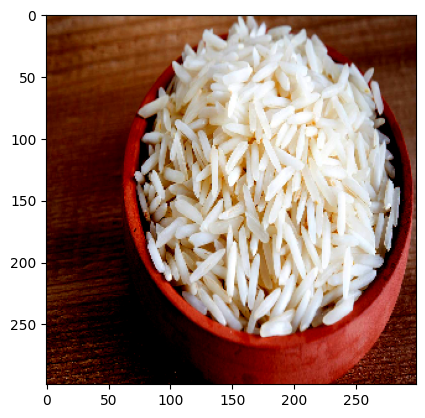

In [ ]:
 # Load the image and resize to the input dimensions that Xception
# was trained with
from urllib.request import urlopen
from io import BytesIO
image_path = '/content/rice.jpg'
#with urlopen(image_path) as raw:
 #   img = image.load_img(BytesIO(raw.read()), target_size=image_size)
plt.imshow(img)

In [ ]:
 # Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 [==============================] - 0s 348ms/step


Predicted: [('n03729826', 'matchstick', 0.097479165), ('n01930112', 'nematode', 0.06957655), ('n03196217', 'digital_clock', 0.057259485)]


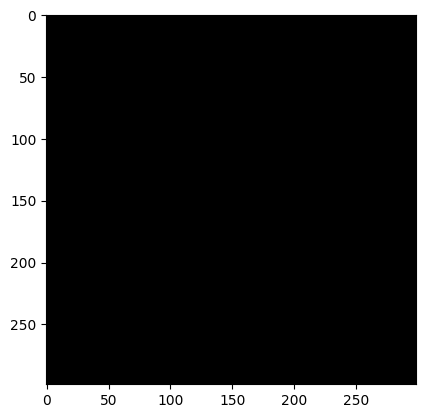

In [ ]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [ ]:
 # Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    #with urlopen(image_path) as raw:
     #   img = image.load_img(BytesIO(raw.read()), target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

1/1 [==============================] - 0s 354ms/step


Predicted: [('n03729826', 'matchstick', 0.097478025), ('n01930112', 'nematode', 0.06957713), ('n03196217', 'digital_clock', 0.057259228)]


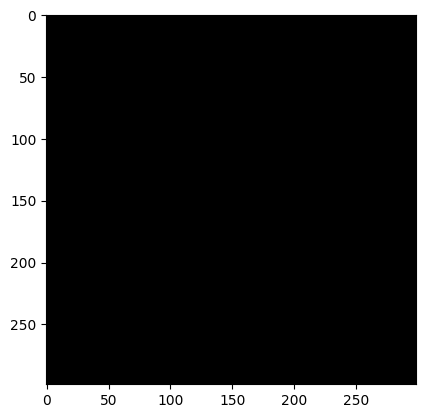

In [ ]:
 image_path = "/content/rice1.jpeg"
predict(image_path)

Pretrained Model 3

In [ ]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19,
    preprocess_input,
    decode_predictions
)

In [ ]:
# Load the VGG19 model
# https://keras.io/api/applications/vgg/#vgg19-function
model = VGG19(include_top=True, weights='imagenet')

574710816/574710816 [==============================] - 8s 0us/step


In [ ]:
# Define default image size for VGG19
image_size = (224, 224)

In [ ]:
# Load the image and resize to default image size
from urllib.request import urlopen
from io import BytesIO
image_path = '/content/rice.jpg'
with urlopen(image_path) as raw:
    img = image.load_img(BytesIO(raw.read()), target_size=image_size)
plt.imshow(img)

ValueError: unknown url type: '/content/rice.jpg'

In [ ]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 [==============================] - 1s 883ms/step
Predicted: [[('n02007558', 'flamingo', 0.9658126), ('n01855672', 'goose', 0.010761663), ('n02006656', 'spoonbill', 0.009033228)]]


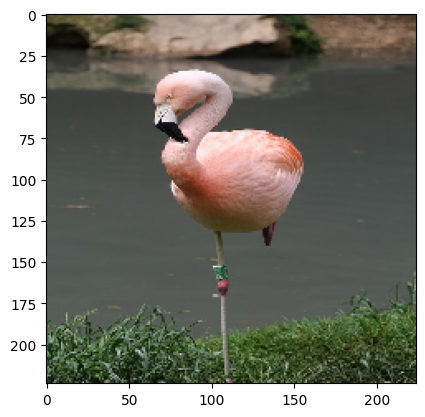

In [ ]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [ ]:
 # Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    with urlopen(image_path) as raw:
        img = image.load_img(BytesIO(raw.read()), target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

In [ ]:
 image_path = "/content/rice1.jpeg"
predict(image_path)

ValueError: unknown url type: '/content/rice1.jpeg'

Scarping Images from website #1

In [3]:
#Import web scarping dependencies
from bs4 import BeautifulSoup
import requests

In [35]:
#Make a aget request to retrieve your webpage and then pass the contents of the page through Beautiful Soup
html_page = requests.get('http://books.toscrape.com/')
soup = BeautifulSoup(html_page.content, 'html.parser')
warning = soup.find('div', class_="alert alert-warning")

image_list = []

rice_container = warning.nextSibling.nextSibling
images = rice_container.findAll('img')
example = images[0]
example

#if warning is not None:
    # If the warning element exists, find the next sibling element and then find all `img` elements within it.
#     rice_container = warning.nextSibling.nextSibling
#     images = rice_container.findAll('img')
#     image_list.append(images)
# else:
#     # If the warning element does not exist, find the `<div>` element with the ID `content` and then find all `img` elements within it.
#     rice_container = soup.find('div', id="content")
#     if rice_container is not None:
#       images = rice_container.findAll('img')
#       image_list.append(images)



<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>

In [39]:
example.attrs['src']

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

In [41]:
url_base = "http://books.toscrape.com/" #Original website
url_ext = example.attrs['src'] #The extension you pulled earlier
full_url = url_base + url_ext #Combining first 2 variables to create       a complete URL
r = requests.get(full_url, stream=True) #Get request on full_url
if r.status_code == 200:                     #200 status code = OK
   with open("images/book1.jpg", 'wb') as f:
      r.raw.decode_content = True
      shutil.copyfileobj(r.raw, f)

FileNotFoundError: [Errno 2] No such file or directory: 'images/book1.jpg'

Training a model #1

In [45]:
!pip install PyDrive
!pip install PyDrive2

In [46]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [47]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [61]:
download = drive.CreateFile({'id': '1g10hH6i9nZ_g_eD_5gZ0g31d_7gW0K-'})
download.GetContentFile('RiceImages.zip')

!unzip RiceImages.zip

ApiRequestError: <HttpError 404 when requesting https://www.googleapis.com/drive/v2/files/1g10hH6i9nZ_g_eD_5gZ0g31d_7gW0K-?alt=json returned "File not found: 1g10hH6i9nZ_g_eD_5gZ0g31d_7gW0K-". Details: "[{'message': 'File not found: 1g10hH6i9nZ_g_eD_5gZ0g31d_7gW0K-', 'domain': 'global', 'reason': 'notFound', 'location': 'file', 'locationType': 'other'}]">

PreTrained Model #2

In [62]:
!pip install tqdm
!pip install seaborn

In [63]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
import numpy as np
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random
from glob import glob
from keras.models import *
from keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array,array_to_img
from IPython.display import display
from PIL import Image

In [64]:
mapping_path = '/kaggle/input/imagenet-object-localization-challenge/LOC_synset_mapping.txt'

# Creating of mapping dictionaries to get the image classes

class_mapping_dict = {}
class_mapping_dict_number = {}
mapping_class_to_number = {}
mapping_number_to_class = {}
i = 0
for line in open(mapping_path):
    class_mapping_dict[line[:9].strip()] = line[9:].strip()
    class_mapping_dict_number[i] = line[9:].strip()
    mapping_class_to_number[line[:9].strip()] = i
    mapping_number_to_class[i] = line[:9].strip()
    i+=1
train_path = '/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train'

# Creation of dataset_array and true_classes

dataset_array = []
true_classes = []
images_array = []
for train_class in tqdm(os.listdir(train_path)):
    i = 0
    for el in os.listdir(train_path + '/' + train_class):
        if i < 10:
            path = train_path + '/' + train_class + '/' + el
            image = load_img(path,target_size=(224,224,3))
            image_array = img_to_array(image).astype(np.uint8)
            images_array.append(image_array)
            true_class = class_mapping_dict[path.split('/')[-2]]
            true_classes.append(true_class)
            i+=1
        else:
            break
images_array = np.array(images_array)
true_classes = np.array(true_classes)
print('Preprocessing in progress')
dataset_array = preprocess_input(images_array)
print('FINISH')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/imagenet-object-localization-challenge/LOC_synset_mapping.txt'

PreTrained Model #4

In [65]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [70]:
local_zip = '/CaliforniaProduce/California_Produce.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/CaliforniaProduce'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training pictures
train_rice_dir = os.path.join(train_dir, 'rice')
train_strawberry_dir = os.path.join(train_dir, 'strawberry')
train_lettuce_dir = os.path.join(train_dir, 'lettuce')
train_grapes_dir = os.path.join(train_dir, 'grapes')
train_dairy_dir = os.path.join(train_dir, 'dairy')
train_almond_dir = os.path.join(train_dir, 'almond')

# Directory with our validation pictures
validation_rice_dir = os.path.join(validation_dir, 'rice')
validation_strawberry_dir = os.path.join(validation_dir, 'strawberry')
validation_lettuce_dir = os.path.join(validation_dir, 'lettuce')
validation_grapes_dir = os.path.join(validation_dir, 'grapes')
validation_dairy_dir = os.path.join(validation_dir, 'dairy')
validation_almond_dir = os.path.join(validation_dir, 'almond')



In [86]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_rice_fnames = os.listdir( train_rice_dir )
train_strawberry_fnames = os.listdir( train_strawberry_dir )
train_lettuce_fnames = os.listdir( train_lettuce_dir )
train_grapes_fnames = os.listdir( train_grapes_dir )
train_dairy_fnames = os.listdir( train_dairy_dir )
train_almond_fnames = os.listdir( train_almond_dir )


next_rice_pix = [os.path.join(train_rice_dir, fname)
                for fname in train_rice_fnames[ pic_index-8:pic_index]
               ]


next_strawberry_pix = [os.path.join(train_strawberry_dir, fname)
                for fname in train_strawberry_fnames[ pic_index-8:pic_index]
]

next_lettuce_pix = [os.path.join(train_lettuce_dir, fname)
                for fname in train_lettuce_fnames[ pic_index-8:pic_index]
]

next_grapes_pix = [os.path.join(train_grapes_dir, fname)
                for fname in train_grapes_fnames[ pic_index-8:pic_index]
]

next_dairy_pix = [os.path.join(train_dairy_dir, fname)
                for fname in train_dairy_fnames[ pic_index-8:pic_index]
]

next_almond_pix = [os.path.join(train_almond_dir, fname)
                for fname in train_almond_fnames[ pic_index-8:pic_index]
]

for i, img_path in enumerate(next_rice_pix+next_strawberry_pix+next_lettuce_pix+next_grapes_pix+next_dairy_pix+next_almond_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

<Figure size 1600x1600 with 0 Axes>

In [87]:
#Image Augmentation

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [88]:
#Training and Validating Sets
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 42 images belonging to 7 classes.
Found 0 images belonging to 0 classes.


In [89]:

from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [90]:

for layer in base_model.layers:
    layer.trainable = False

In [91]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [93]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 10, epochs = 10)


Epoch 1/10
 3/10 [========>.....................] - ETA: 45s - loss: -862.9445 - acc: 0.1667 

10/10 [==============================] - 27s 1s/step - loss: -862.9445 - acc: 0.1667


In [95]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Found 42 images belonging to 7 classes.
Found 0 images belonging to 0 classes.


<ipython-input-95-5b3d41d9c846>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


Epoch 1/10
  3/100 [..............................] - ETA: 1:58 - loss: -1962.6786 - acc: 0.1429   

100/100 [==============================] - 10s 29ms/step - loss: -1962.6786 - acc: 0.1429


In [99]:
model.predict(x)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'